# Sampling in Python

# Bias Any Stretch of the Imagination

## Reasons for sampling
Sampling is an important technique in your statistical arsenal. It isn't always appropriate though—you need to know when to use it and when to work with the whole dataset.

Which of the following is not a good scenario to use sampling?

* You've been handed one terabyte of data about error logs for your company's device.

* You wish to learn about the travel habits of all Pakistani adult citizens.

* **You've finished collecting data on a small study of the wing measurements for 10 butterflies.**

* You are working to predict customer turnover on a big data project for your marketing firm.

Commendations on your justifications for not sampling! Ten butterflies is a small dataset, so sampling isn't useful here.

## Simple sampling with pandas
Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

* Sample 1000 rows from `spotify_population`, assigning to `spotify_sample`.

In [11]:
import pandas as pd
import pyarrow.feather as feather

spotify_population = feather.read_feather('datasets/spotify_2000_2020.feather')

# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

       acousticness                                          artists  \
23898      0.000073                            ['A Day To Remember']   
26862      0.218000                                  ['Roddy Ricch']   
325        0.005890                           ['David Crowder Band']   
17340      0.000102                            ['Killswitch Engage']   
21746      0.122000  ['Akon', "Colby O'Donis", 'Kardinal Offishall']   
...             ...                                              ...   
24684      0.472000                                ['Billie Eilish']   
23936      0.000096                                     ['Paramore']   
39941      0.065400                                  ['Terri Clark']   
12344      0.481000                                  ['Kevin Gates']   
16245      0.544000                                ['William Singe']   

       danceability  duration_ms  duration_minutes  energy  explicit  \
23898         0.241     180840.0          3.014000   0.970     

* Calculate the mean duration in minutes from `spotify_population` using pandas.
* Calculate the mean duration in minutes from `spotify_sample` using pandas.

In [12]:
import pandas as pd

# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                                     artists  danceability  \
1459        0.01290                              ['Khruangbin']         0.661   
10341       0.15500            ['Bethel Music', 'Jenn Johnson']         0.466   
33605       0.13600                      ['South Park Mexican']         0.870   
23035       0.30100                                   ['JAY-Z']         0.800   
35328       0.76900                                   ['Drake']         0.854   
...             ...                                         ...           ...   
8942        0.28200  ['Mos Def', 'Pharoahe Monch', 'Nate Dogg']         0.654   
31515       0.01420                      ['Fat Joe', 'Ashanti']         0.829   
23250       0.59900                             ['Robert John']         0.431   
30401       0.12900                                ['Maroon 5']         0.675   
27943       0.00341                              ['Fireflight']         0.458   

       duration_ms  duratio

Powerful point estimating! Notice that the mean song duration in the sample is similar, but not identical to the mean song duration in the whole population.

## Simple sampling and calculating with NumPy
You can also use numpy to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

* Create a pandas Series from the loudness column of `spotify_population`, assigning it to `loudness_pop`.
* Sample `loudness_pop` to get 100 random values, assigning to `loudness_samp`.

In [13]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Print the sample
print(loudness_samp)

37004   -12.679
12492    -6.038
6863     -6.158
41627    -6.246
14534    -8.833
          ...  
11629   -13.024
10538    -8.600
22652    -6.474
35904    -4.505
7097    -10.073
Name: loudness, Length: 100, dtype: float64


* Calculate the mean of `loudness_pop` using numpy.
* Calculate the mean of `loudness_samp` using numpy.

In [15]:
import numpy as np

# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353918
-7.372889999999997


Devious means! Again, notice that the calculated value (the mean) is close but not identical in each case.

## Are the findings from this sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

* Plot a histogram of the acousticness from `spotify_population` with bins of width 0.01 from 0 to 1 using pandas `.hist()`.

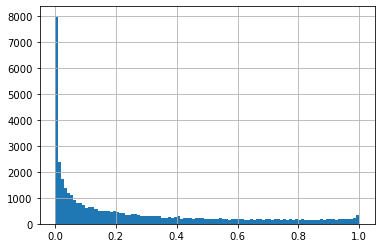

In [16]:
import matplotlib.pyplot as plt 

# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

* Update the histogram code to use the `spotify_mysterious_sample` dataset.

In [ ]:
# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

Compare the two histograms you drew. Are the acousticness values in the sample generalizable to the general population?

* Yes. Any sample should lead to a generalizable result about the population.

* Yes. The sample selected is likely a random sample of all songs in our population.

* No. Samples can never lead to generalizable results about the population.

* **No. The acousticness samples are consistently higher than those in the general population.**

* No. The acousticness samples are consistently lower than those in the general population.

Ace acouticness analysis! The acousticness values in the sample are all greater than 0.95, whereas they range from 0 to 1 in the whole population.

## Are these findings generalizable?
Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

* Plot a histogram of `duration_minutes` from `spotify_population` with bins of width 0.5 from 0 to 15 using pandas `.hist()`.

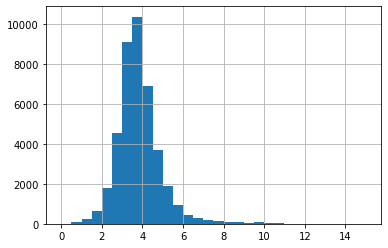

In [18]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

* Update the histogram code to use the `spotify_mysterious_sample2` dataset.

In [ ]:
# Update the histogram to use spotify_mysterious_sample2
spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

Compare the two histograms you drew. Are the duration values in the sample generalizable to the general population?

* Yes. Any sample should lead to a generalizable result about the population.

* **Yes. The sample selected is likely a random sample of all songs in the population.**

* No. Samples can never lead to generalizable results about the population.

* No. The duration samples are consistently higher than those in the general population.

* No. The duration samples are consistently lower than those in the general population.

Delightful duration distribution analysis! The duration values in the sample show a similar distribution to those in the whole population, so the results are generalizable.

## Generating random numbers
You've used `.sample()` to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.

* Generate 5000 numbers from a uniform distribution, setting the parameters low to -3 and high to 3.

In [19]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print uniforms
print(uniforms)

[-2.90613058 -2.89808906  0.69691224 ...  2.08064709  2.89140952
 -0.05835649]


* Generate 5000 numbers from a normal distribution, setting the parameters loc to 5 and scale to 2.

In [20]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

[9.83668323 9.72215221 7.12665881 ... 5.73179277 5.76906889 4.48213925]


* Plot a histogram of uniforms with bins of width of 0.25 from -3 to 3 using pandas `.hist()`.

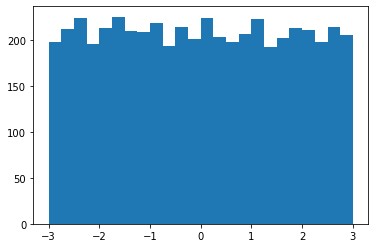

In [21]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

* Plot a histogram of normals with bins of width of 0.5 from -2 to 13 using pandas `.hist()`.

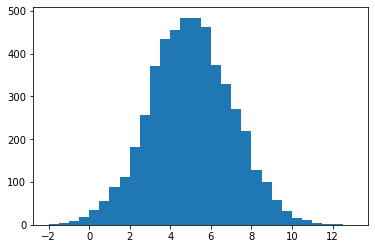

In [22]:
# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

Hunky-dory histogramming! Notice how the histograms almost take the flat and bell curve shapes of the uniform and normal distributions, but there is a bit of random noise.

## Understanding random seeds
While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward conversations with your boss when your script for calculating the sales forecast gives different answers each time.

Setting the seed for numpy's random number generator helps avoid such problems by making the random number generation reproducible.

* Which statement about x and y is true?
```python
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
```

* **x and y have identical values.**

* The first value of x is identical to the first value of y, but other values are different.

* The values of x are different from those of y.

Which statement about x and y is true?
```python
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)
```
* x and y have identical values.

* The first value of x is identical to the first value of y, but other values are different.

* **The values of x are different from those of y.**

Correct! Since different seeds are used, the generation will be different for x and y.